In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import numpy as np


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC



In [2]:
data = pd.read_csv('final_with_covid_AS.csv')
data.head()

,CountCases,BedDys,BeddystoCC,Severity,DiedCases,DiedBdDys,Hsptlsns,April,August,December,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,CovidPrd
0,17,133,7.823529,75,4,9,13,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,13,372,28.615385,63,4,34,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,106,13.250000,48,4,13,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,218,4.844444,153,3,24,42,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,24,238,9.916667,90,3,8,21,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
filtered_data5 = data[data['Pedestrian'] == 1]
filtered_data5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6086 entries, 0 to 54037
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       6086 non-null   int64  
 1   BedDys           6086 non-null   int64  
 2   BeddystoCC       6086 non-null   float64
 3   Severity         6086 non-null   int64  
 4   DiedCases        6086 non-null   int64  
 5   DiedBdDys        6086 non-null   int64  
 6   Hsptlsns         6086 non-null   int64  
 7   April            6086 non-null   int64  
 8   August           6086 non-null   int64  
 9   December         6086 non-null   int64  
 10  February         6086 non-null   int64  
 11  January          6086 non-null   int64  
 12  July             6086 non-null   int64  
 13  June             6086 non-null   int64  
 14  March            6086 non-null   int64  
 15  May              6086 non-null   int64  
 16  November         6086 non-null   int64  
 17  October          6

In [4]:
num_bins = 2

bed_days_min = filtered_data5['Severity'].min()
bed_days_max = filtered_data5['Severity'].max()

bin_width = (bed_days_max - bed_days_min) / num_bins
bins = [bed_days_min + i * bin_width for i in range(num_bins + 1)]

def bin_function(x):
    for i in range(1, len(bins)):
        if x <= bins[i]:
            return i - 1
    return i

filtered_data5['Bed_days_category'] = filtered_data5['Severity'].apply(bin_function)

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_1751/2563099148.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data5['Bed_days_category'] = filtered_data5['Severity'].apply(bin_function)


In [5]:
from xgboost import XGBClassifier

X = filtered_data5[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   
                   'Male','Female',
                   
                   'Regional','MajorCities',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]



y = filtered_data5['Bed_days_category']

adasyn smote normall LOGESTIC REGRESSION

In [6]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN  # Import SMOTE and ADASYN
import numpy as np

# Define entropy function
def calculate_entropy(probabilities):
    epsilon = 1e-10  # Small constant to avoid log(0)
    return -np.mean(np.sum(probabilities * np.log(probabilities + epsilon), axis=1))

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list_before = []
precision_list_before = []
recall_list_before = []
f1_list_before = []
entropy_list_before = []
confusion_matrices_before = []

accuracy_list_smote = []
precision_list_smote = []
recall_list_smote = []
f1_list_smote = []
entropy_list_smote = []
confusion_matrices_smote = []

accuracy_list_adasyn = []
precision_list_adasyn = []
recall_list_adasyn = []
f1_list_adasyn = []
entropy_list_adasyn = []
confusion_matrices_adasyn = []

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Logistic Regression model without SMOTE/ADASYN
    logreg_model = LogisticRegression(random_state=42, max_iter=1000)
    logreg_model.fit(X_train, y_train)
    
    # Predictions and probabilities before SMOTE/ADASYN
    y_pred_before = logreg_model.predict(X_test)
    y_prob_before = logreg_model.predict_proba(X_test)
    
    # Calculate entropy before SMOTE/ADASYN
    entropy_before = calculate_entropy(y_prob_before)
    entropy_list_before.append(entropy_before)
    
    # Store metrics before SMOTE/ADASYN
    accuracy_list_before.append(accuracy_score(y_test, y_pred_before))
    precision_list_before.append(precision_score(y_test, y_pred_before))
    recall_list_before.append(recall_score(y_test, y_pred_before))
    f1_list_before.append(f1_score(y_test, y_pred_before))
    confusion_matrices_before.append(confusion_matrix(y_test, y_pred_before))
    
    # Apply SMOTE to the training data
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    # Initialize and train the Logistic Regression model with SMOTE
    logreg_model_smote = LogisticRegression(random_state=42, max_iter=1000)
    logreg_model_smote.fit(X_train_smote, y_train_smote)
    
    # Predictions and probabilities after SMOTE
    y_pred_smote = logreg_model_smote.predict(X_test)
    y_prob_smote = logreg_model_smote.predict_proba(X_test)
    
    # Calculate entropy after SMOTE
    entropy_smote = calculate_entropy(y_prob_smote)
    entropy_list_smote.append(entropy_smote)
    
    # Store metrics after SMOTE
    accuracy_list_smote.append(accuracy_score(y_test, y_pred_smote))
    precision_list_smote.append(precision_score(y_test, y_pred_smote))
    recall_list_smote.append(recall_score(y_test, y_pred_smote))
    f1_list_smote.append(f1_score(y_test, y_pred_smote))
    confusion_matrices_smote.append(confusion_matrix(y_test, y_pred_smote))
    
    # Apply ADASYN to the training data
    adasyn = ADASYN(random_state=42)
    X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
    
    # Initialize and train the Logistic Regression model with ADASYN
    logreg_model_adasyn = LogisticRegression(random_state=42, max_iter=1000)
    logreg_model_adasyn.fit(X_train_adasyn, y_train_adasyn)
    
    # Predictions and probabilities after ADASYN
    y_pred_adasyn = logreg_model_adasyn.predict(X_test)
    y_prob_adasyn = logreg_model_adasyn.predict_proba(X_test)
    
    # Calculate entropy after ADASYN
    entropy_adasyn = calculate_entropy(y_prob_adasyn)
    entropy_list_adasyn.append(entropy_adasyn)
    
    # Store metrics after ADASYN
    accuracy_list_adasyn.append(accuracy_score(y_test, y_pred_adasyn))
    precision_list_adasyn.append(precision_score(y_test, y_pred_adasyn))
    recall_list_adasyn.append(recall_score(y_test, y_pred_adasyn))
    f1_list_adasyn.append(f1_score(y_test, y_pred_adasyn))
    confusion_matrices_adasyn.append(confusion_matrix(y_test, y_pred_adasyn))
    
    print(f'Confusion Matrix for Fold {len(confusion_matrices_before)} Before Oversampling:\n', confusion_matrices_before[-1])
    print(f'Confusion Matrix for Fold {len(confusion_matrices_smote)} After SMOTE:\n', confusion_matrices_smote[-1])
    print(f'Confusion Matrix for Fold {len(confusion_matrices_adasyn)} After ADASYN:\n', confusion_matrices_adasyn[-1])

# Calculate mean and standard deviation of each metric before oversampling
mean_accuracy_before = np.mean(accuracy_list_before)
std_accuracy_before = np.std(accuracy_list_before)
mean_precision_before = np.mean(precision_list_before)
std_precision_before = np.std(precision_list_before)
mean_recall_before = np.mean(recall_list_before)
std_recall_before = np.std(recall_list_before)
mean_f1_before = np.mean(f1_list_before)
std_f1_before = np.std(f1_list_before)
mean_entropy_before = np.mean(entropy_list_before)
std_entropy_before = np.std(entropy_list_before)

# Calculate mean and standard deviation of each metric after SMOTE
mean_accuracy_smote = np.mean(accuracy_list_smote)
std_accuracy_smote = np.std(accuracy_list_smote)
mean_precision_smote = np.mean(precision_list_smote)
std_precision_smote = np.std(precision_list_smote)
mean_recall_smote = np.mean(recall_list_smote)
std_recall_smote = np.std(recall_list_smote)
mean_f1_smote = np.mean(f1_list_smote)
std_f1_smote = np.std(f1_list_smote)
mean_entropy_smote = np.mean(entropy_list_smote)
std_entropy_smote = np.std(entropy_list_smote)
# Calculate mean and standard deviation of each metric after ADASYN
mean_accuracy_adasyn = np.mean(accuracy_list_adasyn)
std_accuracy_adasyn = np.std(accuracy_list_adasyn)
mean_precision_adasyn = np.mean(precision_list_adasyn)
std_precision_adasyn = np.std(precision_list_adasyn)
mean_recall_adasyn = np.mean(recall_list_adasyn)
std_recall_adasyn = np.std(recall_list_adasyn)
mean_f1_adasyn = np.mean(f1_list_adasyn)
std_f1_adasyn = np.std(f1_list_adasyn)
mean_entropy_adasyn = np.mean(entropy_list_adasyn)
std_entropy_adasyn = np.std(entropy_list_adasyn)

# Calculate mean confusion matrix before and after SMOTE/ADASYN
mean_conf_matrix_before = np.mean(confusion_matrices_before, axis=0)
mean_conf_matrix_smote = np.mean(confusion_matrices_smote, axis=0)
mean_conf_matrix_adasyn = np.mean(confusion_matrices_adasyn, axis=0)

# Print results before oversampling
print('--- Before Oversampling ---')
print('Mean Accuracy:', mean_accuracy_before)
print('Accuracy Std Dev:', std_accuracy_before)
print('Mean Precision:', mean_precision_before)
print('Precision Std Dev:', std_precision_before)
print('Mean Recall:', mean_recall_before)
print('Recall Std Dev:', std_recall_before)
print('Mean F1-score:', mean_f1_before)
print('F1-score Std Dev:', std_f1_before)
print('Mean Entropy:', mean_entropy_before)
print('Entropy Std Dev:', std_entropy_before)
print('Mean Confusion Matrix:\n', mean_conf_matrix_before)

# Print results after SMOTE
print('--- After SMOTE ---')
print('Mean Accuracy:', mean_accuracy_smote)
print('Accuracy Std Dev:', std_accuracy_smote)
print('Mean Precision:', mean_precision_smote)
print('Precision Std Dev:', std_precision_smote)
print('Mean Recall:', mean_recall_smote)
print('Recall Std Dev:', std_recall_smote)
print('Mean F1-score:', mean_f1_smote)
print('F1-score Std Dev:', std_f1_smote)
print('Mean Entropy:', mean_entropy_smote)
print('Entropy Std Dev:', std_entropy_smote)
print('Mean Confusion Matrix:\n', mean_conf_matrix_smote)

# Print results after ADASYN
print('--- After ADASYN ---')
print('Mean Accuracy:', mean_accuracy_adasyn)
print('Accuracy Std Dev:', std_accuracy_adasyn)
print('Mean Precision:', mean_precision_adasyn)
print('Precision Std Dev:', std_precision_adasyn)
print('Mean Recall:', mean_recall_adasyn)
print('Recall Std Dev:', std_recall_adasyn)
print('Mean F1-score:', mean_f1_adasyn)
print('F1-score Std Dev:', std_f1_adasyn)
print('Mean Entropy:', mean_entropy_adasyn)
print('Entropy Std Dev:', std_entropy_adasyn)
print('Mean Confusion Matrix:\n', mean_conf_matrix_adasyn)

# Calculate mean and standard deviation of each metric after ADASYN


Confusion Matrix for Fold 1 Before Oversampling:
 [[593   1]
 [ 12   3]]
Confusion Matrix for Fold 1 After SMOTE:
 [[551  43]
 [  5  10]]
Confusion Matrix for Fold 1 After ADASYN:
 [[551  43]
 [  5  10]]
Confusion Matrix for Fold 2 Before Oversampling:
 [[592   2]
 [ 13   2]]
Confusion Matrix for Fold 2 After SMOTE:
 [[567  27]
 [  8   7]]
Confusion Matrix for Fold 2 After ADASYN:
 [[566  28]
 [  8   7]]
Confusion Matrix for Fold 3 Before Oversampling:
 [[594   1]
 [ 13   1]]
Confusion Matrix for Fold 3 After SMOTE:
 [[562  33]
 [  4  10]]
Confusion Matrix for Fold 3 After ADASYN:
 [[560  35]
 [  4  10]]
Confusion Matrix for Fold 4 Before Oversampling:
 [[591   4]
 [ 13   1]]
Confusion Matrix for Fold 4 After SMOTE:
 [[568  27]
 [  8   6]]
Confusion Matrix for Fold 4 After ADASYN:
 [[568  27]
 [  9   5]]
Confusion Matrix for Fold 5 Before Oversampling:
 [[594   1]
 [ 11   3]]
Confusion Matrix for Fold 5 After SMOTE:
 [[570  25]
 [  2  12]]
Confusion Matrix for Fold 5 After ADASYN:
 [[5

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
uncertainty_list = []  # List to store entropy for each fold
confusion_matrices = []

# Choose an oversampling method
# oversampler = SMOTE(random_state=42)
# oversampler = ADASYN(random_state=42)
oversampler = RandomOverSampler(random_state=42)

# Function to calculate entropy
def calculate_entropy(probabilities):
    entropy = -np.sum(probabilities * np.log(probabilities + 1e-9), axis=1)  # Add small value to avoid log(0)
    return np.mean(entropy)

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply oversampling
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    
    # Initialize and train the Logistic Regression model
    logreg_model = LogisticRegression(random_state=42, max_iter=1000)
    logreg_model.fit(X_train_resampled, y_train_resampled)
    
    # Predict probabilities and classes
    y_pred_logreg = logreg_model.predict(X_test)
    y_prob_logreg = logreg_model.predict_proba(X_test)
    
    # Calculate and store entropy
    entropy = calculate_entropy(y_prob_logreg)
    uncertainty_list.append(entropy)
    
    # Store metrics
    accuracy_list.append(accuracy_score(y_test, y_pred_logreg))
    precision_list.append(precision_score(y_test, y_pred_logreg))
    recall_list.append(recall_score(y_test, y_pred_logreg))
    f1_list.append(f1_score(y_test, y_pred_logreg))
    
    # Store confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_logreg)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean and standard deviation of entropy
mean_entropy = np.mean(uncertainty_list)
std_entropy = np.std(uncertainty_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

# Print results
print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Entropy:', mean_entropy)
print('Entropy Std Dev:', std_entropy)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[535  59]
 [  1  14]]
Confusion Matrix for Fold 2:
 [[549  45]
 [  4  11]]
Confusion Matrix for Fold 3:
 [[525  70]
 [  0  14]]
Confusion Matrix for Fold 4:
 [[552  43]
 [  3  11]]
Confusion Matrix for Fold 5:
 [[539  56]
 [  0  14]]
Confusion Matrix for Fold 6:
 [[541  54]
 [  2  12]]
Confusion Matrix for Fold 7:
 [[552  42]
 [  0  14]]
Confusion Matrix for Fold 8:
 [[556  38]
 [  1  13]]
Confusion Matrix for Fold 9:
 [[546  48]
 [  2  12]]
Confusion Matrix for Fold 10:
 [[535  59]
 [  0  14]]
Mean Accuracy: 0.9134133825944171
Accuracy Std Dev: 0.014498891330234291
Mean Precision: 0.20370807282370537
Precision Std Dev: 0.02641968807664146
Mean Recall: 0.9095238095238095
Recall Std Dev: 0.0924839877052207
Mean F1-score: 0.3316781408707815
F1-score Std Dev: 0.036510518359716304
Mean Entropy: 0.1066244325986931
Entropy Std Dev: 0.008832140039984341
Mean Confusion Matrix:
 [[543.   51.4]
 [  1.3  12.9]]


ADASYB SMOTE XGBOOST

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN
import numpy as np
import xgboost as xgb  # Import XGBoost

# Define entropy function
def calculate_entropy(probabilities):
    epsilon = 1e-10  # Small constant to avoid log(0)
    return -np.mean(np.sum(probabilities * np.log(probabilities + epsilon), axis=1))

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list_before = []
precision_list_before = []
recall_list_before = []
f1_list_before = []
entropy_list_before = []
confusion_matrices_before = []

accuracy_list_smote = []
precision_list_smote = []
recall_list_smote = []
f1_list_smote = []
entropy_list_smote = []
confusion_matrices_smote = []

accuracy_list_adasyn = []
precision_list_adasyn = []
recall_list_adasyn = []
f1_list_adasyn = []
entropy_list_adasyn = []
confusion_matrices_adasyn = []

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the XGBoost model without SMOTE/ADASYN
    xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)
    
    # Predictions and probabilities before SMOTE/ADASYN
    y_pred_before = xgb_model.predict(X_test)
    y_prob_before = xgb_model.predict_proba(X_test)
    
    # Calculate entropy before SMOTE/ADASYN
    entropy_before = calculate_entropy(y_prob_before)
    entropy_list_before.append(entropy_before)
    
    # Store metrics before SMOTE/ADASYN
    accuracy_list_before.append(accuracy_score(y_test, y_pred_before))
    precision_list_before.append(precision_score(y_test, y_pred_before))
    recall_list_before.append(recall_score(y_test, y_pred_before))
    f1_list_before.append(f1_score(y_test, y_pred_before))
    confusion_matrices_before.append(confusion_matrix(y_test, y_pred_before))
    
    # Apply SMOTE to the training data
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    # Initialize and train the XGBoost model with SMOTE
    xgb_model_smote = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    xgb_model_smote.fit(X_train_smote, y_train_smote)
    
    # Predictions and probabilities after SMOTE
    y_pred_smote = xgb_model_smote.predict(X_test)
    y_prob_smote = xgb_model_smote.predict_proba(X_test)
    
    # Calculate entropy after SMOTE
    entropy_smote = calculate_entropy(y_prob_smote)
    entropy_list_smote.append(entropy_smote)
    
    # Store metrics after SMOTE
    accuracy_list_smote.append(accuracy_score(y_test, y_pred_smote))
    precision_list_smote.append(precision_score(y_test, y_pred_smote))
    recall_list_smote.append(recall_score(y_test, y_pred_smote))
    f1_list_smote.append(f1_score(y_test, y_pred_smote))
    confusion_matrices_smote.append(confusion_matrix(y_test, y_pred_smote))
    
    # Apply ADASYN to the training data
    adasyn = ADASYN(random_state=42)
    X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
    
    # Initialize and train the XGBoost model with ADASYN
    xgb_model_adasyn = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    xgb_model_adasyn.fit(X_train_adasyn, y_train_adasyn)
    
    # Predictions and probabilities after ADASYN
    y_pred_adasyn = xgb_model_adasyn.predict(X_test)
    y_prob_adasyn = xgb_model_adasyn.predict_proba(X_test)
    
    # Calculate entropy after ADASYN
    entropy_adasyn = calculate_entropy(y_prob_adasyn)
    entropy_list_adasyn.append(entropy_adasyn)
    
    # Store metrics after ADASYN
    accuracy_list_adasyn.append(accuracy_score(y_test, y_pred_adasyn))
    precision_list_adasyn.append(precision_score(y_test, y_pred_adasyn))
    recall_list_adasyn.append(recall_score(y_test, y_pred_adasyn))
    f1_list_adasyn.append(f1_score(y_test, y_pred_adasyn))
    confusion_matrices_adasyn.append(confusion_matrix(y_test, y_pred_adasyn))
    
    print(f'Confusion Matrix for Fold {len(confusion_matrices_before)} Before Oversampling:\n', confusion_matrices_before[-1])
    print(f'Confusion Matrix for Fold {len(confusion_matrices_smote)} After SMOTE:\n', confusion_matrices_smote[-1])
    print(f'Confusion Matrix for Fold {len(confusion_matrices_adasyn)} After ADASYN:\n', confusion_matrices_adasyn[-1])

# Calculate mean and standard deviation of each metric before oversampling
mean_accuracy_before = np.mean(accuracy_list_before)
std_accuracy_before = np.std(accuracy_list_before)
mean_precision_before = np.mean(precision_list_before)
std_precision_before = np.std(precision_list_before)
mean_recall_before = np.mean(recall_list_before)
std_recall_before = np.std(recall_list_before)
mean_f1_before = np.mean(f1_list_before)
std_f1_before = np.std(f1_list_before)
mean_entropy_before = np.mean(entropy_list_before)
std_entropy_before = np.std(entropy_list_before)

# Calculate mean and standard deviation of each metric after SMOTE
mean_accuracy_smote = np.mean(accuracy_list_smote)
std_accuracy_smote = np.std(accuracy_list_smote)
mean_precision_smote = np.mean(precision_list_smote)
std_precision_smote = np.std(precision_list_smote)
mean_recall_smote = np.mean(recall_list_smote)
std_recall_smote = np.std(recall_list_smote)
mean_f1_smote = np.mean(f1_list_smote)
std_f1_smote = np.std(f1_list_smote)
mean_entropy_smote = np.mean(entropy_list_smote)
std_entropy_smote = np.std(entropy_list_smote)

# Calculate mean and standard deviation of each metric after ADASYN
mean_accuracy_adasyn = np.mean(accuracy_list_adasyn)
std_accuracy_adasyn = np.std(accuracy_list_adasyn)
mean_precision_adasyn = np.mean(precision_list_adasyn)
std_precision_adasyn = np.std(precision_list_adasyn)
mean_recall_adasyn = np.mean(recall_list_adasyn)
std_recall_adasyn = np.std(recall_list_adasyn)
mean_f1_adasyn = np.mean(f1_list_adasyn)
std_f1_adasyn = np.std(f1_list_adasyn)
mean_entropy_adasyn = np.mean(entropy_list_adasyn)
std_entropy_adasyn = np.std(entropy_list_adasyn)

# Calculate mean confusion matrix before and after SMOTE/ADASYN
mean_conf_matrix_before = np.mean(confusion_matrices_before, axis=0)
mean_conf_matrix_smote = np.mean(confusion_matrices_smote, axis=0)
mean_conf_matrix_adasyn = np.mean(confusion_matrices_adasyn, axis=0)

# Print results before oversampling
print('--- Before Oversampling ---')
print('Mean Accuracy:', mean_accuracy_before)
print('Accuracy Std Dev:', std_accuracy_before)
print('Mean Precision:', mean_precision_before)
print('Precision Std Dev:', std_precision_before)
print('Mean Recall:', mean_recall_before)
print('Recall Std Dev:', std_recall_before)
print('Mean F1-score:', mean_f1_before)
print('F1-score Std Dev:', std_f1_before)
print('Mean Entropy:', mean_entropy_before)
print('Entropy Std Dev:', std_entropy_before)
print('Mean Confusion Matrix:\n', mean_conf_matrix_before)

# Print results after SMOTE
print('--- After SMOTE ---')
print('Mean Accuracy:', mean_accuracy_smote)
print('Accuracy Std Dev:', std_accuracy_smote)
print('Mean Precision:', mean_precision_smote)
print('Precision Std Dev:', std_precision_smote)
print('Mean Recall:', mean_recall_smote)
print('Recall Std Dev:', std_recall_smote)
print('Mean F1-score:', mean_f1_smote)
print('F1-score Std Dev:', std_f1_smote)
print('Mean Entropy:', mean_entropy_smote)
print('Entropy Std Dev:', std_entropy_smote)
print('Mean Confusion Matrix:\n', mean_conf_matrix_smote)

# Print results after ADASYN
print('--- After ADASYN ---')
print('Mean Accuracy:', mean_accuracy_adasyn)
print('Accuracy Std Dev:', std_accuracy_adasyn)
print('Mean Precision:', mean_precision_adasyn)
print('Precision Std Dev:', std_precision_adasyn)
print('Mean Recall:', mean_recall_adasyn)
print('Recall Std Dev:', std_recall_adasyn)
print('Mean F1-score:', mean_f1_adasyn)
print('F1-score Std Dev:', std_f1_adasyn)
print('Mean Entropy:', mean_entropy_adasyn)
print('Entropy Std Dev:', std_entropy_adasyn)
print('Mean Confusion Matrix:\n', mean_conf_matrix_adasyn)


Confusion Matrix for Fold 1 Before Oversampling:
 [[588   6]
 [  9   6]]
Confusion Matrix for Fold 1 After SMOTE:
 [[567  27]
 [  7   8]]
Confusion Matrix for Fold 1 After ADASYN:
 [[567  27]
 [  7   8]]
Confusion Matrix for Fold 2 Before Oversampling:
 [[589   5]
 [ 10   5]]
Confusion Matrix for Fold 2 After SMOTE:
 [[571  23]
 [  7   8]]
Confusion Matrix for Fold 2 After ADASYN:
 [[571  23]
 [  7   8]]
Confusion Matrix for Fold 3 Before Oversampling:
 [[589   6]
 [  9   5]]
Confusion Matrix for Fold 3 After SMOTE:
 [[577  18]
 [  4  10]]
Confusion Matrix for Fold 3 After ADASYN:
 [[578  17]
 [  4  10]]
Confusion Matrix for Fold 4 Before Oversampling:
 [[589   6]
 [ 11   3]]
Confusion Matrix for Fold 4 After SMOTE:
 [[577  18]
 [  7   7]]
Confusion Matrix for Fold 4 After ADASYN:
 [[576  19]
 [  9   5]]
Confusion Matrix for Fold 5 Before Oversampling:
 [[591   4]
 [  7   7]]
Confusion Matrix for Fold 5 After SMOTE:
 [[578  17]
 [  2  12]]
Confusion Matrix for Fold 5 After ADASYN:
 [[5

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from xgboost import XGBClassifier
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
uncertainty_list = []  # List to store entropy for each fold
confusion_matrices = []

# Choose an oversampling method
# oversampler = SMOTE(random_state=42)
#oversampler = ADASYN(random_state=42)
oversampler = RandomOverSampler(random_state=42)

# Function to calculate entropy
def calculate_entropy(probabilities):
    entropy = -np.sum(probabilities * np.log(probabilities + 1e-9), axis=1)  # Add small value to avoid log(0)
    return np.mean(entropy)

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply oversampling
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train_resampled, y_train_resampled)
    
    # Predict probabilities and classes
    y_pred_xgb = xgb_model.predict(X_test)
    y_prob_xgb = xgb_model.predict_proba(X_test)
    
    # Calculate and store entropy
    entropy = calculate_entropy(y_prob_xgb)
    uncertainty_list.append(entropy)
    
    # Store metrics
    accuracy_list.append(accuracy_score(y_test, y_pred_xgb))
    precision_list.append(precision_score(y_test, y_pred_xgb))
    recall_list.append(recall_score(y_test, y_pred_xgb))
    f1_list.append(f1_score(y_test, y_pred_xgb))
    
    # Store confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean and standard deviation of entropy
mean_entropy = np.mean(uncertainty_list)
std_entropy = np.std(uncertainty_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

# Print results
print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Entropy:', mean_entropy)
print('Entropy Std Dev:', std_entropy)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[574  20]
 [  8   7]]
Confusion Matrix for Fold 2:
 [[577  17]
 [  9   6]]
Confusion Matrix for Fold 3:
 [[579  16]
 [  3  11]]
Confusion Matrix for Fold 4:
 [[581  14]
 [  8   6]]
Confusion Matrix for Fold 5:
 [[580  15]
 [  2  12]]
Confusion Matrix for Fold 6:
 [[580  15]
 [  6   8]]
Confusion Matrix for Fold 7:
 [[591   3]
 [  9   5]]
Confusion Matrix for Fold 8:
 [[583  11]
 [  8   6]]
Confusion Matrix for Fold 9:
 [[581  13]
 [  6   8]]
Confusion Matrix for Fold 10:
 [[579  15]
 [  5   9]]
Mean Accuracy: 0.966647761645493
Accuracy Std Dev: 0.006958673819510547
Mean Precision: 0.37537003207079933
Precision Std Dev: 0.10083576794829015
Mean Recall: 0.5509523809523809
Recall Std Dev: 0.15986176000821825
Mean F1-score: 0.43289169318409354
F1-score Std Dev: 0.08296749281867662
Mean Entropy: 0.03793801
Entropy Std Dev: 0.004987636
Mean Confusion Matrix:
 [[580.5  13.9]
 [  6.4   7.8]]


decesion tree

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN
import numpy as np

# Define entropy function
def calculate_entropy(probabilities):
    epsilon = 1e-10  # Small constant to avoid log(0)
    return -np.mean(np.sum(probabilities * np.log(probabilities + epsilon), axis=1))

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list_before = []
precision_list_before = []
recall_list_before = []
f1_list_before = []
entropy_list_before = []
confusion_matrices_before = []

accuracy_list_smote = []
precision_list_smote = []
recall_list_smote = []
f1_list_smote = []
entropy_list_smote = []
confusion_matrices_smote = []

accuracy_list_adasyn = []
precision_list_adasyn = []
recall_list_adasyn = []
f1_list_adasyn = []
entropy_list_adasyn = []
confusion_matrices_adasyn = []

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Decision Tree model without SMOTE/ADASYN
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)
    
    # Predictions and probabilities before SMOTE/ADASYN
    y_pred_before = dt_model.predict(X_test)
    y_prob_before = dt_model.predict_proba(X_test)
    
    # Calculate entropy before SMOTE/ADASYN
    entropy_before = calculate_entropy(y_prob_before)
    entropy_list_before.append(entropy_before)
    
    # Store metrics before SMOTE/ADASYN
    accuracy_list_before.append(accuracy_score(y_test, y_pred_before))
    precision_list_before.append(precision_score(y_test, y_pred_before))
    recall_list_before.append(recall_score(y_test, y_pred_before))
    f1_list_before.append(f1_score(y_test, y_pred_before))
    confusion_matrices_before.append(confusion_matrix(y_test, y_pred_before))
    
    # Apply SMOTE to the training data
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    # Initialize and train the Decision Tree model with SMOTE
    dt_model_smote = DecisionTreeClassifier(random_state=42)
    dt_model_smote.fit(X_train_smote, y_train_smote)
    
    # Predictions and probabilities after SMOTE
    y_pred_smote = dt_model_smote.predict(X_test)
    y_prob_smote = dt_model_smote.predict_proba(X_test)
    
    # Calculate entropy after SMOTE
    entropy_smote = calculate_entropy(y_prob_smote)
    entropy_list_smote.append(entropy_smote)
    
    # Store metrics after SMOTE
    accuracy_list_smote.append(accuracy_score(y_test, y_pred_smote))
    precision_list_smote.append(precision_score(y_test, y_pred_smote))
    recall_list_smote.append(recall_score(y_test, y_pred_smote))
    f1_list_smote.append(f1_score(y_test, y_pred_smote))
    confusion_matrices_smote.append(confusion_matrix(y_test, y_pred_smote))
    
    # Apply ADASYN to the training data
    adasyn = ADASYN(random_state=42)
    X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
    
    # Initialize and train the Decision Tree model with ADASYN
    dt_model_adasyn = DecisionTreeClassifier(random_state=42)
    dt_model_adasyn.fit(X_train_adasyn, y_train_adasyn)
    
    # Predictions and probabilities after ADASYN
    y_pred_adasyn = dt_model_adasyn.predict(X_test)
    y_prob_adasyn = dt_model_adasyn.predict_proba(X_test)
    
    # Calculate entropy after ADASYN
    entropy_adasyn = calculate_entropy(y_prob_adasyn)
    entropy_list_adasyn.append(entropy_adasyn)
    
    # Store metrics after ADASYN
    accuracy_list_adasyn.append(accuracy_score(y_test, y_pred_adasyn))
    precision_list_adasyn.append(precision_score(y_test, y_pred_adasyn))
    recall_list_adasyn.append(recall_score(y_test, y_pred_adasyn))
    f1_list_adasyn.append(f1_score(y_test, y_pred_adasyn))
    confusion_matrices_adasyn.append(confusion_matrix(y_test, y_pred_adasyn))
    
    print(f'Confusion Matrix for Fold {len(confusion_matrices_before)} Before Oversampling:\n', confusion_matrices_before[-1])
    print(f'Confusion Matrix for Fold {len(confusion_matrices_smote)} After SMOTE:\n', confusion_matrices_smote[-1])
    print(f'Confusion Matrix for Fold {len(confusion_matrices_adasyn)} After ADASYN:\n', confusion_matrices_adasyn[-1])

# Calculate mean and standard deviation of each metric before oversampling
mean_accuracy_before = np.mean(accuracy_list_before)
std_accuracy_before = np.std(accuracy_list_before)
mean_precision_before = np.mean(precision_list_before)
std_precision_before = np.std(precision_list_before)
mean_recall_before = np.mean(recall_list_before)
std_recall_before = np.std(recall_list_before)
mean_f1_before = np.mean(f1_list_before)
std_f1_before = np.std(f1_list_before)
mean_entropy_before = np.mean(entropy_list_before)
std_entropy_before = np.std(entropy_list_before)

# Calculate mean and standard deviation of each metric after SMOTE
mean_accuracy_smote = np.mean(accuracy_list_smote)
std_accuracy_smote = np.std(accuracy_list_smote)
mean_precision_smote = np.mean(precision_list_smote)
std_precision_smote = np.std(precision_list_smote)
mean_recall_smote = np.mean(recall_list_smote)
std_recall_smote = np.std(recall_list_smote)
mean_f1_smote = np.mean(f1_list_smote)
std_f1_smote = np.std(f1_list_smote)
mean_entropy_smote = np.mean(entropy_list_smote)
std_entropy_smote = np.std(entropy_list_smote)

# Calculate mean and standard deviation of each metric after ADASYN
mean_accuracy_adasyn = np.mean(accuracy_list_adasyn)
std_accuracy_adasyn = np.std(accuracy_list_adasyn)
mean_precision_adasyn = np.mean(precision_list_adasyn)
std_precision_adasyn = np.std(precision_list_adasyn)
mean_recall_adasyn = np.mean(recall_list_adasyn)
std_recall_adasyn = np.std(recall_list_adasyn)
mean_f1_adasyn = np.mean(f1_list_adasyn)
std_f1_adasyn = np.std(f1_list_adasyn)
mean_entropy_adasyn = np.mean(entropy_list_adasyn)
std_entropy_adasyn = np.std(entropy_list_adasyn)

# Calculate mean confusion matrix before and after SMOTE/ADASYN
mean_conf_matrix_before = np.mean(confusion_matrices_before, axis=0)
mean_conf_matrix_smote = np.mean(confusion_matrices_smote, axis=0)
mean_conf_matrix_adasyn = np.mean(confusion_matrices_adasyn, axis=0)

# Print results before oversampling
print('--- Before Oversampling ---')
print('Mean Accuracy:', mean_accuracy_before)
print('Accuracy Std Dev:', std_accuracy_before)
print('Mean Precision:', mean_precision_before)
print('Precision Std Dev:', std_precision_before)
print('Mean Recall:', mean_recall_before)
print('Recall Std Dev:', std_recall_before)
print('Mean F1-score:', mean_f1_before)
print('F1-score Std Dev:', std_f1_before)
print('Mean Entropy:', mean_entropy_before)
print('Entropy Std Dev:', std_entropy_before)
print('Mean Confusion Matrix:\n', mean_conf_matrix_before)

# Print results after SMOTE
print('--- After SMOTE ---')
print('Mean Accuracy:', mean_accuracy_smote)
print('Accuracy Std Dev:', std_accuracy_smote)
print('Mean Precision:', mean_precision_smote)
print('Precision Std Dev:', std_precision_smote)
print('Mean Recall:', mean_recall_smote)
print('Recall Std Dev:', std_recall_smote)
print('Mean F1-score:', mean_f1_smote)
print('F1-score Std Dev:', std_f1_smote)
print('Mean Entropy:', mean_entropy_smote)
print('Entropy Std Dev:', std_entropy_smote)
print('Mean Confusion Matrix:\n', mean_conf_matrix_smote)

# Print results after ADASYN
print('--- After ADASYN ---')
print('Mean Accuracy:', mean_accuracy_adasyn)
print('Accuracy Std Dev:', std_accuracy_adasyn)
print('Mean Precision:', mean_precision_adasyn)
print('Precision Std Dev:', std_precision_adasyn)
print('Mean Recall:', mean_recall_adasyn)
print('Recall Std Dev:', std_recall_adasyn)
print('Mean F1-score:', mean_f1_adasyn)
print('F1-score Std Dev:', std_f1_adasyn)
print('Mean Entropy:', mean_entropy_adasyn)
print('Entropy Std Dev:', std_entropy_adasyn)
print('Mean Confusion Matrix:\n', mean_conf_matrix_adasyn)


Confusion Matrix for Fold 1 Before Oversampling:
 [[574  20]
 [ 12   3]]
Confusion Matrix for Fold 1 After SMOTE:
 [[557  37]
 [  9   6]]
Confusion Matrix for Fold 1 After ADASYN:
 [[558  36]
 [ 11   4]]
Confusion Matrix for Fold 2 Before Oversampling:
 [[579  15]
 [ 11   4]]
Confusion Matrix for Fold 2 After SMOTE:
 [[558  36]
 [  6   9]]
Confusion Matrix for Fold 2 After ADASYN:
 [[557  37]
 [  6   9]]
Confusion Matrix for Fold 3 Before Oversampling:
 [[579  16]
 [  6   8]]
Confusion Matrix for Fold 3 After SMOTE:
 [[574  21]
 [  6   8]]
Confusion Matrix for Fold 3 After ADASYN:
 [[573  22]
 [  5   9]]
Confusion Matrix for Fold 4 Before Oversampling:
 [[580  15]
 [  9   5]]
Confusion Matrix for Fold 4 After SMOTE:
 [[573  22]
 [  9   5]]
Confusion Matrix for Fold 4 After ADASYN:
 [[573  22]
 [  9   5]]
Confusion Matrix for Fold 5 Before Oversampling:
 [[581  14]
 [  6   8]]
Confusion Matrix for Fold 5 After SMOTE:
 [[571  24]
 [  2  12]]
Confusion Matrix for Fold 5 After ADASYN:
 [[5

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
uncertainty_list = []  # List to store entropy for each fold
confusion_matrices = []

# Choose an oversampling method
# oversampler = SMOTE(random_state=42)
# oversampler = ADASYN(random_state=42)
oversampler = RandomOverSampler(random_state=42)

# Function to calculate entropy
def calculate_entropy(probabilities):
    entropy = -np.sum(probabilities * np.log(probabilities + 1e-9), axis=1)  # Add small value to avoid log(0)
    return np.mean(entropy)

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply oversampling
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    
    # Initialize and train the Decision Tree model
    decision_tree_model = DecisionTreeClassifier(random_state=42)
    decision_tree_model.fit(X_train_resampled, y_train_resampled)
    
    # Predict probabilities and classes
    y_pred_tree = decision_tree_model.predict(X_test)
    y_prob_tree = decision_tree_model.predict_proba(X_test)
    
    # Calculate and store entropy
    entropy = calculate_entropy(y_prob_tree)
    uncertainty_list.append(entropy)
    
    # Store metrics
    accuracy_list.append(accuracy_score(y_test, y_pred_tree))
    precision_list.append(precision_score(y_test, y_pred_tree))
    recall_list.append(recall_score(y_test, y_pred_tree))
    f1_list.append(f1_score(y_test, y_pred_tree))
    
    # Store confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_tree)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean and standard deviation of entropy
mean_entropy = np.mean(uncertainty_list)
std_entropy = np.std(uncertainty_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

# Print results
print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Entropy:', mean_entropy)
print('Entropy Std Dev:', std_entropy)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[575  19]
 [ 12   3]]
Confusion Matrix for Fold 2:
 [[578  16]
 [  8   7]]
Confusion Matrix for Fold 3:
 [[586   9]
 [  9   5]]
Confusion Matrix for Fold 4:
 [[586   9]
 [ 13   1]]
Confusion Matrix for Fold 5:
 [[585  10]
 [ 11   3]]
Confusion Matrix for Fold 6:
 [[585  10]
 [ 10   4]]
Confusion Matrix for Fold 7:
 [[592   2]
 [ 10   4]]
Confusion Matrix for Fold 8:
 [[587   7]
 [ 11   3]]
Confusion Matrix for Fold 9:
 [[584  10]
 [  7   7]]
Confusion Matrix for Fold 10:
 [[581  13]
 [  7   7]]
Mean Accuracy: 0.9666485718606861
Accuracy Std Dev: 0.007726889237672997
Mean Precision: 0.3142769208625986
Precision Std Dev: 0.1491494349608623
Mean Recall: 0.30952380952380953
Recall Std Dev: 0.13692442922914774
Mean F1-score: 0.29923735223145986
F1-score Std Dev: 0.11318830791559581
Mean Entropy: -1.0000000822403707e-09
Entropy Std Dev: 1.601828368361763e-25
Mean Confusion Matrix:
 [[583.9  10.5]
 [  9.8   4.4]]


Random forrest

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN
import numpy as np

# Define entropy function
def calculate_entropy(probabilities):
    epsilon = 1e-10  # Small constant to avoid log(0)
    return -np.mean(np.sum(probabilities * np.log(probabilities + epsilon), axis=1))

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list_before = []
precision_list_before = []
recall_list_before = []
f1_list_before = []
entropy_list_before = []
confusion_matrices_before = []

accuracy_list_smote = []
precision_list_smote = []
recall_list_smote = []
f1_list_smote = []
entropy_list_smote = []
confusion_matrices_smote = []

accuracy_list_adasyn = []
precision_list_adasyn = []
recall_list_adasyn = []
f1_list_adasyn = []
entropy_list_adasyn = []
confusion_matrices_adasyn = []

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model without SMOTE/ADASYN
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Predictions and probabilities before SMOTE/ADASYN
    y_pred_before = rf_model.predict(X_test)
    y_prob_before = rf_model.predict_proba(X_test)
    
    # Calculate entropy before SMOTE/ADASYN
    entropy_before = calculate_entropy(y_prob_before)
    entropy_list_before.append(entropy_before)
    
    # Store metrics before SMOTE/ADASYN
    accuracy_list_before.append(accuracy_score(y_test, y_pred_before))
    precision_list_before.append(precision_score(y_test, y_pred_before))
    recall_list_before.append(recall_score(y_test, y_pred_before))
    f1_list_before.append(f1_score(y_test, y_pred_before))
    confusion_matrices_before.append(confusion_matrix(y_test, y_pred_before))
    
    # Apply SMOTE to the training data
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    # Initialize and train the Random Forest model with SMOTE
    rf_model_smote = RandomForestClassifier(random_state=42)
    rf_model_smote.fit(X_train_smote, y_train_smote)
    
    # Predictions and probabilities after SMOTE
    y_pred_smote = rf_model_smote.predict(X_test)
    y_prob_smote = rf_model_smote.predict_proba(X_test)
    
    # Calculate entropy after SMOTE
    entropy_smote = calculate_entropy(y_prob_smote)
    entropy_list_smote.append(entropy_smote)
    
    # Store metrics after SMOTE
    accuracy_list_smote.append(accuracy_score(y_test, y_pred_smote))
    precision_list_smote.append(precision_score(y_test, y_pred_smote))
    recall_list_smote.append(recall_score(y_test, y_pred_smote))
    f1_list_smote.append(f1_score(y_test, y_pred_smote))
    confusion_matrices_smote.append(confusion_matrix(y_test, y_pred_smote))
    
    # Apply ADASYN to the training data
    adasyn = ADASYN(random_state=42)
    X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
    
    # Initialize and train the Random Forest model with ADASYN
    rf_model_adasyn = RandomForestClassifier(random_state=42)
    rf_model_adasyn.fit(X_train_adasyn, y_train_adasyn)
    
    # Predictions and probabilities after ADASYN
    y_pred_adasyn = rf_model_adasyn.predict(X_test)
    y_prob_adasyn = rf_model_adasyn.predict_proba(X_test)
    
    # Calculate entropy after ADASYN
    entropy_adasyn = calculate_entropy(y_prob_adasyn)
    entropy_list_adasyn.append(entropy_adasyn)
    
    # Store metrics after ADASYN
    accuracy_list_adasyn.append(accuracy_score(y_test, y_pred_adasyn))
    precision_list_adasyn.append(precision_score(y_test, y_pred_adasyn))
    recall_list_adasyn.append(recall_score(y_test, y_pred_adasyn))
    f1_list_adasyn.append(f1_score(y_test, y_pred_adasyn))
    confusion_matrices_adasyn.append(confusion_matrix(y_test, y_pred_adasyn))
    
    print(f'Confusion Matrix for Fold {len(confusion_matrices_before)} Before Oversampling:\n', confusion_matrices_before[-1])
    print(f'Confusion Matrix for Fold {len(confusion_matrices_smote)} After SMOTE:\n', confusion_matrices_smote[-1])
    print(f'Confusion Matrix for Fold {len(confusion_matrices_adasyn)} After ADASYN:\n', confusion_matrices_adasyn[-1])

# Calculate mean and standard deviation of each metric before oversampling
mean_accuracy_before = np.mean(accuracy_list_before)
std_accuracy_before = np.std(accuracy_list_before)
mean_precision_before = np.mean(precision_list_before)
std_precision_before = np.std(precision_list_before)
mean_recall_before = np.mean(recall_list_before)
std_recall_before = np.std(recall_list_before)
mean_f1_before = np.mean(f1_list_before)
std_f1_before = np.std(f1_list_before)
mean_entropy_before = np.mean(entropy_list_before)
std_entropy_before = np.std(entropy_list_before)

# Calculate mean and standard deviation of each metric after SMOTE
mean_accuracy_smote = np.mean(accuracy_list_smote)
std_accuracy_smote = np.std(accuracy_list_smote)
mean_precision_smote = np.mean(precision_list_smote)
std_precision_smote = np.std(precision_list_smote)
mean_recall_smote = np.mean(recall_list_smote)
std_recall_smote = np.std(recall_list_smote)
mean_f1_smote = np.mean(f1_list_smote)
std_f1_smote = np.std(f1_list_smote)
mean_entropy_smote = np.mean(entropy_list_smote)
std_entropy_smote = np.std(entropy_list_smote)

# Calculate mean and standard deviation of each metric after ADASYN
mean_accuracy_adasyn = np.mean(accuracy_list_adasyn)
std_accuracy_adasyn = np.std(accuracy_list_adasyn)
mean_precision_adasyn = np.mean(precision_list_adasyn)
std_precision_adasyn = np.std(precision_list_adasyn)
mean_recall_adasyn = np.mean(recall_list_adasyn)
std_recall_adasyn = np.std(recall_list_adasyn)
mean_f1_adasyn = np.mean(f1_list_adasyn)
std_f1_adasyn = np.std(f1_list_adasyn)
mean_entropy_adasyn = np.mean(entropy_list_adasyn)
std_entropy_adasyn = np.std(entropy_list_adasyn)

# Calculate mean confusion matrix before and after SMOTE/ADASYN
mean_conf_matrix_before = np.mean(confusion_matrices_before, axis=0)
mean_conf_matrix_smote = np.mean(confusion_matrices_smote, axis=0)
mean_conf_matrix_adasyn = np.mean(confusion_matrices_adasyn, axis=0)

# Print results before oversampling
print('--- Before Oversampling ---')
print('Mean Accuracy:', mean_accuracy_before)
print('Accuracy Std Dev:', std_accuracy_before)
print('Mean Precision:', mean_precision_before)
print('Precision Std Dev:', std_precision_before)
print('Mean Recall:', mean_recall_before)
print('Recall Std Dev:', std_recall_before)
print('Mean F1-score:', mean_f1_before)
print('F1-score Std Dev:', std_f1_before)
print('Mean Entropy:', mean_entropy_before)
print('Entropy Std Dev:', std_entropy_before)
print('Mean Confusion Matrix:\n', mean_conf_matrix_before)

# Print results after SMOTE
print('--- After SMOTE ---')
print('Mean Accuracy:', mean_accuracy_smote)
print('Accuracy Std Dev:', std_accuracy_smote)
print('Mean Precision:', mean_precision_smote)
print('Precision Std Dev:', std_precision_smote)
print('Mean Recall:', mean_recall_smote)
print('Recall Std Dev:', std_recall_smote)
print('Mean F1-score:', mean_f1_smote)
print('F1-score Std Dev:', std_f1_smote)
print('Mean Entropy:', mean_entropy_smote)
print('Entropy Std Dev:', std_entropy_smote)
print('Mean Confusion Matrix:\n', mean_conf_matrix_smote)

# Print results after ADASYN
print('--- After ADASYN ---')
print('Mean Accuracy:', mean_accuracy_adasyn)
print('Accuracy Std Dev:', std_accuracy_adasyn)
print('Mean Precision:', mean_precision_adasyn)
print('Precision Std Dev:', std_precision_adasyn)
print('Mean Recall:', mean_recall_adasyn)
print('Recall Std Dev:', std_recall_adasyn)
print('Mean F1-score:', mean_f1_adasyn)
print('F1-score Std Dev:', std_f1_adasyn)
print('Mean Entropy:', mean_entropy_adasyn)
print('Entropy Std Dev:', std_entropy_adasyn)
print('Mean Confusion Matrix:\n', mean_conf_matrix_adasyn)


Confusion Matrix for Fold 1 Before Oversampling:
 [[586   8]
 [ 12   3]]
Confusion Matrix for Fold 1 After SMOTE:
 [[562  32]
 [  6   9]]
Confusion Matrix for Fold 1 After ADASYN:
 [[563  31]
 [  6   9]]
Confusion Matrix for Fold 2 Before Oversampling:
 [[588   6]
 [ 12   3]]
Confusion Matrix for Fold 2 After SMOTE:
 [[567  27]
 [  7   8]]
Confusion Matrix for Fold 2 After ADASYN:
 [[566  28]
 [  8   7]]
Confusion Matrix for Fold 3 Before Oversampling:
 [[591   4]
 [ 11   3]]
Confusion Matrix for Fold 3 After SMOTE:
 [[576  19]
 [  5   9]]
Confusion Matrix for Fold 3 After ADASYN:
 [[576  19]
 [  5   9]]
Confusion Matrix for Fold 4 Before Oversampling:
 [[591   4]
 [ 13   1]]
Confusion Matrix for Fold 4 After SMOTE:
 [[579  16]
 [  8   6]]
Confusion Matrix for Fold 4 After ADASYN:
 [[578  17]
 [  8   6]]
Confusion Matrix for Fold 5 Before Oversampling:
 [[589   6]
 [ 12   2]]
Confusion Matrix for Fold 5 After SMOTE:
 [[575  20]
 [  5   9]]
Confusion Matrix for Fold 5 After ADASYN:
 [[5

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
uncertainty_list = []  # List to store entropy for each fold
confusion_matrices = []

# Choose an oversampling method
# oversampler = SMOTE(random_state=42)
# oversampler = ADASYN(random_state=42)
oversampler = RandomOverSampler(random_state=42)

# Function to calculate entropy
def calculate_entropy(probabilities):
    entropy = -np.sum(probabilities * np.log(probabilities + 1e-9), axis=1)  # Add small value to avoid log(0)
    return np.mean(entropy)

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply oversampling
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    
    # Initialize and train the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_resampled, y_train_resampled)
    
    # Predict probabilities and classes
    y_pred_rf = rf_model.predict(X_test)
    y_prob_rf = rf_model.predict_proba(X_test)
    
    # Calculate and store entropy
    entropy = calculate_entropy(y_prob_rf)
    uncertainty_list.append(entropy)
    
    # Store metrics
    accuracy_list.append(accuracy_score(y_test, y_pred_rf))
    precision_list.append(precision_score(y_test, y_pred_rf))
    recall_list.append(recall_score(y_test, y_pred_rf))
    f1_list.append(f1_score(y_test, y_pred_rf))
    
    # Store confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_rf)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean and standard deviation of entropy
mean_entropy = np.mean(uncertainty_list)
std_entropy = np.std(uncertainty_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

# Print results
print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Entropy:', mean_entropy)
print('Entropy Std Dev:', std_entropy)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[580  14]
 [ 11   4]]
Confusion Matrix for Fold 2:
 [[580  14]
 [ 11   4]]
Confusion Matrix for Fold 3:
 [[586   9]
 [  8   6]]
Confusion Matrix for Fold 4:
 [[587   8]
 [ 10   4]]
Confusion Matrix for Fold 5:
 [[586   9]
 [  8   6]]
Confusion Matrix for Fold 6:
 [[585  10]
 [ 10   4]]
Confusion Matrix for Fold 7:
 [[592   2]
 [ 10   4]]
Confusion Matrix for Fold 8:
 [[586   8]
 [  9   5]]
Confusion Matrix for Fold 9:
 [[585   9]
 [  9   5]]
Confusion Matrix for Fold 10:
 [[581  13]
 [  8   6]]
Mean Accuracy: 0.9687829487511882
Accuracy Std Dev: 0.006137191664917543
Mean Precision: 0.3587706445601183
Precision Std Dev: 0.11999703867824099
Mean Recall: 0.339047619047619
Recall Std Dev: 0.06611335006403277
Mean F1-score: 0.33969908763012213
F1-score Std Dev: 0.06268782662897278
Mean Entropy: 0.05474911470033984
Entropy Std Dev: 0.007745963092637282
Mean Confusion Matrix:
 [[584.8   9.6]
 [  9.4   4.8]]


Svm

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
uncertainty_list = []  # List to store entropy for each fold
confusion_matrices = []

# Choose an oversampling method
oversampler = SMOTE(random_state=42)
# oversampler = ADASYN(random_state=42)
#oversampler = RandomOverSampler(random_state=42)

# Function to calculate entropy
def calculate_entropy(probabilities):
    entropy = -np.sum(probabilities * np.log(probabilities + 1e-9), axis=1)  # Add small value to avoid log(0)
    return np.mean(entropy)

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply oversampling
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    
    # Initialize and train the SVM model with probability enabled
    svm_model = SVC(probability=True, random_state=42)
    svm_model.fit(X_train_resampled, y_train_resampled)
    
    # Predict probabilities and classes
    y_pred_svm = svm_model.predict(X_test)
    y_prob_svm = svm_model.predict_proba(X_test)
    
    # Calculate and store entropy
    entropy = calculate_entropy(y_prob_svm)
    uncertainty_list.append(entropy)
    
    # Store metrics
    accuracy_list.append(accuracy_score(y_test, y_pred_svm))
    precision_list.append(precision_score(y_test, y_pred_svm))
    recall_list.append(recall_score(y_test, y_pred_svm))
    f1_list.append(f1_score(y_test, y_pred_svm))
    
    # Store confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_svm)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean and standard deviation of entropy
mean_entropy = np.mean(uncertainty_list)
std_entropy = np.std(uncertainty_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

# Print results
print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Entropy:', mean_entropy)
print('Entropy Std Dev:', std_entropy)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[568  26]
 [ 13   2]]
Confusion Matrix for Fold 2:
 [[574  20]
 [  8   7]]
Confusion Matrix for Fold 3:
 [[579  16]
 [  9   5]]
Confusion Matrix for Fold 4:
 [[576  19]
 [ 10   4]]
Confusion Matrix for Fold 5:
 [[584  11]
 [  3  11]]
Confusion Matrix for Fold 6:
 [[570  25]
 [  7   7]]
Confusion Matrix for Fold 7:
 [[580  14]
 [ 10   4]]
Confusion Matrix for Fold 8:
 [[578  16]
 [ 10   4]]
Confusion Matrix for Fold 9:
 [[575  19]
 [  6   8]]
Confusion Matrix for Fold 10:
 [[581  13]
 [ 10   4]]
Mean Accuracy: 0.9564595756632961
Accuracy Std Dev: 0.01004029055796223
Mean Precision: 0.24152587484269067
Precision Std Dev: 0.10309903335425036
Mean Recall: 0.39571428571428563
Recall Std Dev: 0.17821806307031604
Mean F1-score: 0.29773485644909725
F1-score Std Dev: 0.12826589727754908
Mean Entropy: 0.04563156847639842
Entropy Std Dev: 0.005947149676743691
Mean Confusion Matrix:
 [[576.5  17.9]
 [  8.6   5.6]]


In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
uncertainty_list = []  # List to store entropy for each fold
confusion_matrices = []

# Choose an oversampling method
#oversampler = SMOTE(random_state=42)
oversampler = ADASYN(random_state=42)
#oversampler = RandomOverSampler(random_state=42)

# Function to calculate entropy
def calculate_entropy(probabilities):
    entropy = -np.sum(probabilities * np.log(probabilities + 1e-9), axis=1)  # Add small value to avoid log(0)
    return np.mean(entropy)

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply oversampling
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    
    # Initialize and train the SVM model with probability enabled
    svm_model = SVC(probability=True, random_state=42)
    svm_model.fit(X_train_resampled, y_train_resampled)
    
    # Predict probabilities and classes
    y_pred_svm = svm_model.predict(X_test)
    y_prob_svm = svm_model.predict_proba(X_test)
    
    # Calculate and store entropy
    entropy = calculate_entropy(y_prob_svm)
    uncertainty_list.append(entropy)
    
    # Store metrics
    accuracy_list.append(accuracy_score(y_test, y_pred_svm))
    precision_list.append(precision_score(y_test, y_pred_svm))
    recall_list.append(recall_score(y_test, y_pred_svm))
    f1_list.append(f1_score(y_test, y_pred_svm))
    
    # Store confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_svm)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean and standard deviation of entropy
mean_entropy = np.mean(uncertainty_list)
std_entropy = np.std(uncertainty_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

# Print results
print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Entropy:', mean_entropy)
print('Entropy Std Dev:', std_entropy)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[567  27]
 [ 12   3]]
Confusion Matrix for Fold 2:
 [[573  21]
 [  8   7]]
Confusion Matrix for Fold 3:
 [[579  16]
 [  9   5]]
Confusion Matrix for Fold 4:
 [[576  19]
 [ 10   4]]
Confusion Matrix for Fold 5:
 [[581  14]
 [  4  10]]
Confusion Matrix for Fold 6:
 [[572  23]
 [  7   7]]
Confusion Matrix for Fold 7:
 [[580  14]
 [ 10   4]]
Confusion Matrix for Fold 8:
 [[577  17]
 [  9   5]]
Confusion Matrix for Fold 9:
 [[574  20]
 [  6   8]]
Confusion Matrix for Fold 10:
 [[581  13]
 [ 11   3]]
Mean Accuracy: 0.9556380174574368
Accuracy Std Dev: 0.008458627301044304
Mean Precision: 0.23347175167827344
Precision Std Dev: 0.07760448956499369
Mean Recall: 0.3952380952380953
Recall Std Dev: 0.1570562531918633
Mean F1-score: 0.29140729969983337
F1-score Std Dev: 0.10296318509977934
Mean Entropy: 0.04516695192715931
Entropy Std Dev: 0.00625157172050194
Mean Confusion Matrix:
 [[576.   18.4]
 [  8.6   5.6]]


In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
uncertainty_list = []  # List to store entropy for each fold
confusion_matrices = []

# Choose an oversampling method
#oversampler = SMOTE(random_state=42)
#oversampler = ADASYN(random_state=42)
oversampler = RandomOverSampler(random_state=42)

# Function to calculate entropy
def calculate_entropy(probabilities):
    entropy = -np.sum(probabilities * np.log(probabilities + 1e-9), axis=1)  # Add small value to avoid log(0)
    return np.mean(entropy)

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply oversampling
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    
    # Initialize and train the SVM model with probability enabled
    svm_model = SVC(probability=True, random_state=42)
    svm_model.fit(X_train_resampled, y_train_resampled)
    
    # Predict probabilities and classes
    y_pred_svm = svm_model.predict(X_test)
    y_prob_svm = svm_model.predict_proba(X_test)
    
    # Calculate and store entropy
    entropy = calculate_entropy(y_prob_svm)
    uncertainty_list.append(entropy)
    
    # Store metrics
    accuracy_list.append(accuracy_score(y_test, y_pred_svm))
    precision_list.append(precision_score(y_test, y_pred_svm))
    recall_list.append(recall_score(y_test, y_pred_svm))
    f1_list.append(f1_score(y_test, y_pred_svm))
    
    # Store confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_svm)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean and standard deviation of entropy
mean_entropy = np.mean(uncertainty_list)
std_entropy = np.std(uncertainty_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

# Print results
print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Entropy:', mean_entropy)
print('Entropy Std Dev:', std_entropy)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[565  29]
 [  5  10]]
Confusion Matrix for Fold 2:
 [[569  25]
 [  6   9]]
Confusion Matrix for Fold 3:
 [[567  28]
 [  2  12]]
Confusion Matrix for Fold 4:
 [[574  21]
 [  6   8]]
Confusion Matrix for Fold 5:
 [[567  28]
 [  2  12]]
Confusion Matrix for Fold 6:
 [[567  28]
 [  5   9]]
Confusion Matrix for Fold 7:
 [[583  11]
 [  6   8]]
Confusion Matrix for Fold 8:
 [[572  22]
 [  1  13]]
Confusion Matrix for Fold 9:
 [[567  27]
 [  3  11]]
Confusion Matrix for Fold 10:
 [[569  25]
 [  2  12]]
Mean Accuracy: 0.9536683843228762
Accuracy Std Dev: 0.007851875938695291
Mean Precision: 0.30465006625143276
Precision Std Dev: 0.05214569491712381
Mean Recall: 0.7338095238095237
Recall Std Dev: 0.13026138035075613
Mean F1-score: 0.4260766285878656
F1-score Std Dev: 0.05644665492316781
Mean Entropy: 0.016311436656063466
Entropy Std Dev: 0.0048420371696891165
Mean Confusion Matrix:
 [[570.   24.4]
 [  3.8  10.4]]


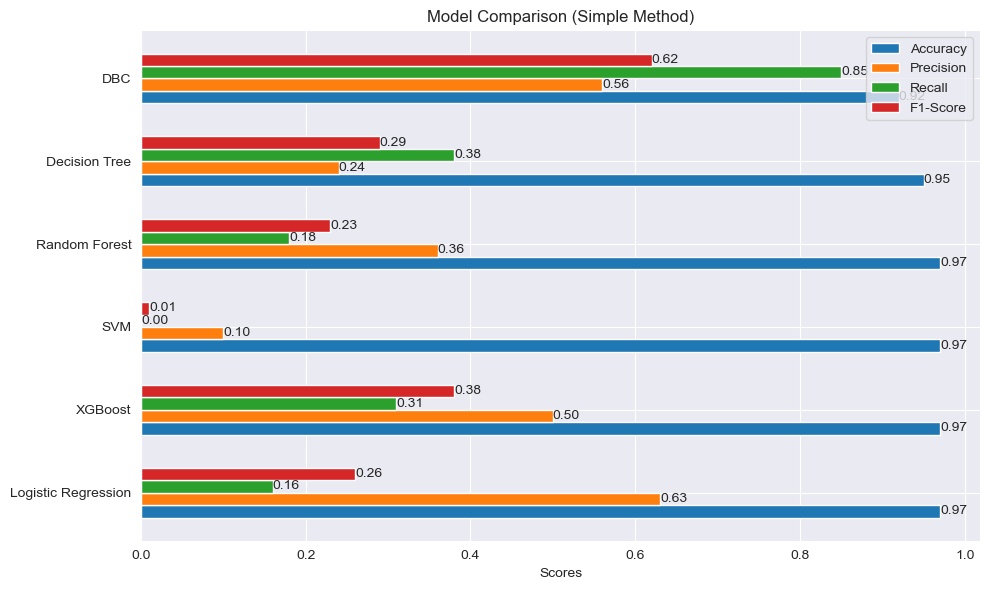

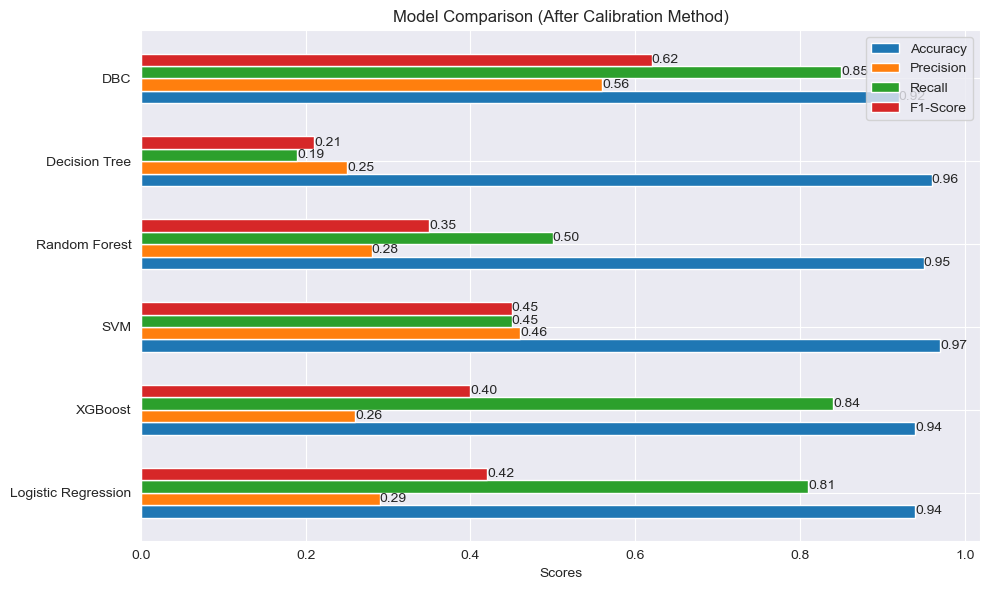

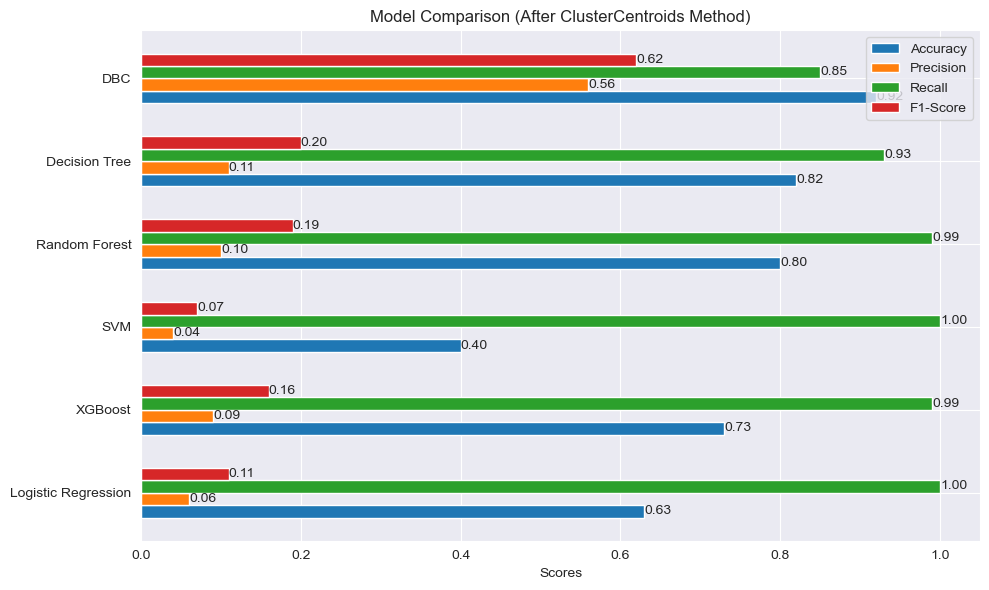

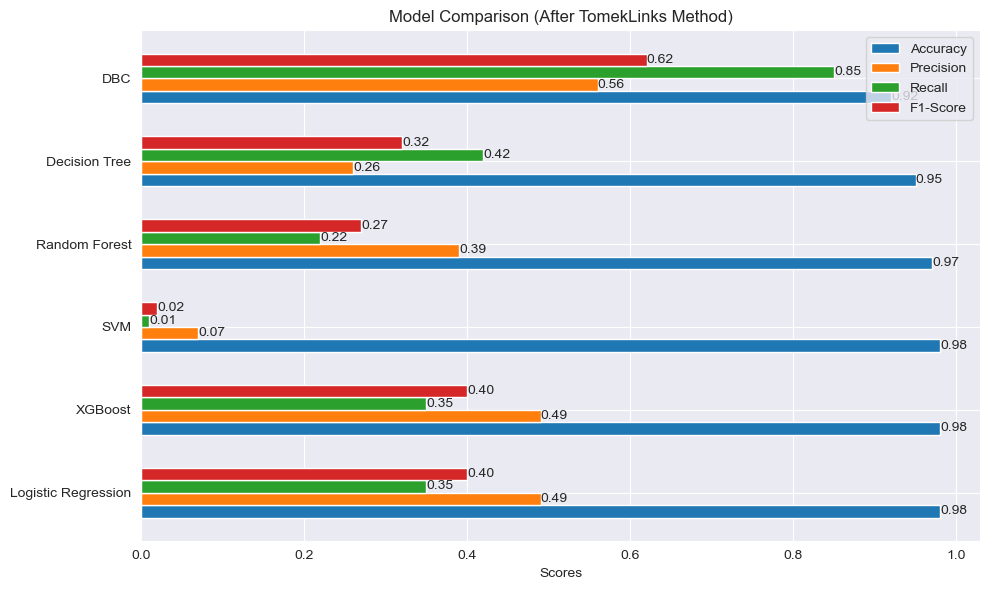

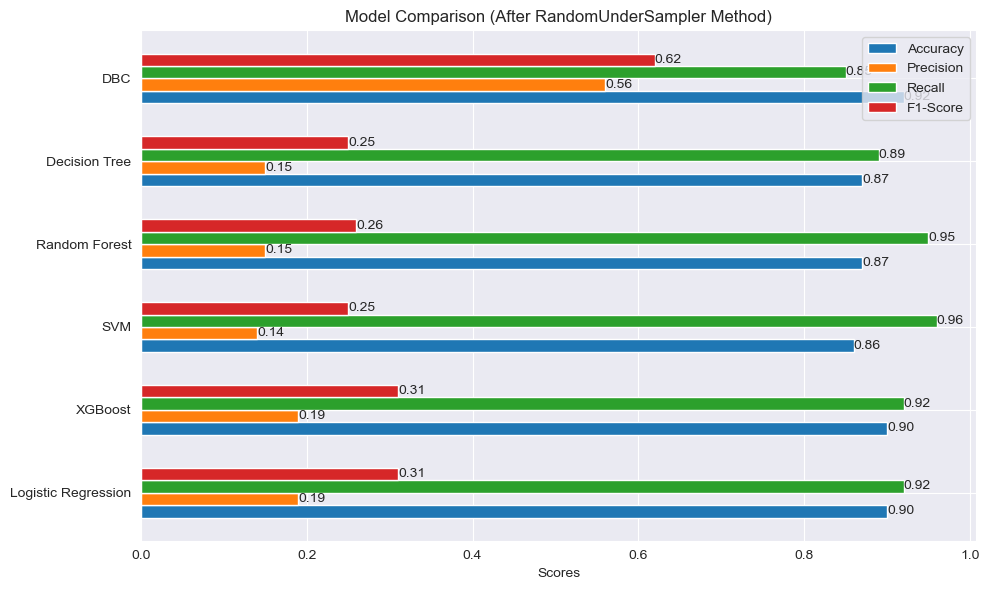

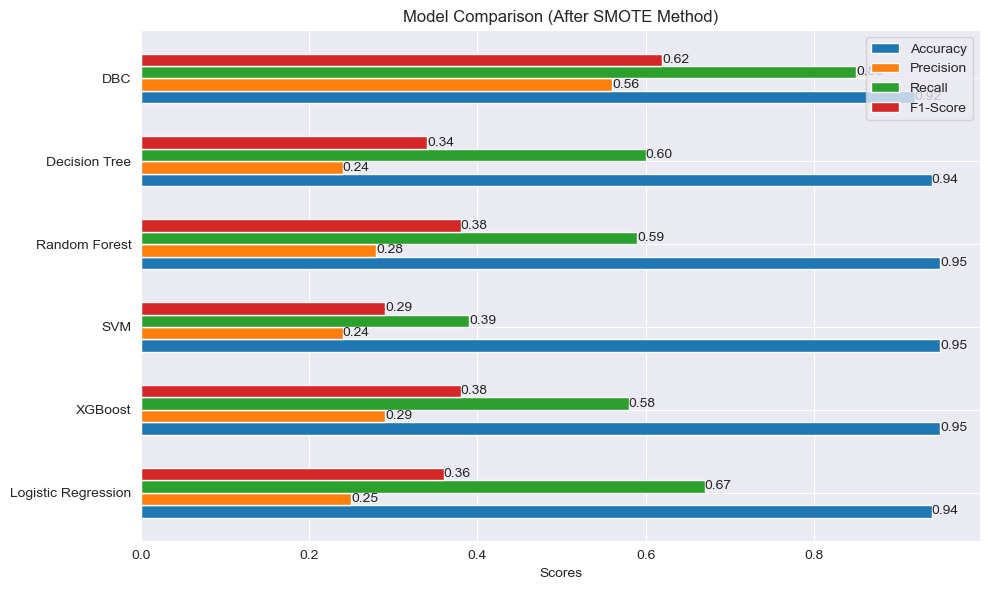

In [11]:
models = ['Logistic Regression', 'XGBoost', 'SVM', 'Random Forest', 'Decision Tree', 'DBC']
methods = {
    'Simple': {
        'accuracy': [0.97, 0.97, 0.97, 0.97, 0.95, 0.92],
        'precision': [0.63, 0.50, 0.10, 0.36, 0.24, 0.56],
        'recall': [0.16, 0.31, 0.00, 0.18, 0.38, 0.85],
        'f1_score': [0.26, 0.38, 0.01, 0.23, 0.29, 0.62]
    },
    'After Calibration': {
        'accuracy': [0.94, 0.94, 0.97, 0.95, 0.96, 0.92],
        'precision': [0.29, 0.26, 0.46, 0.28, 0.25, 0.56],
        'recall': [0.81, 0.84, 0.45, 0.50, 0.19, 0.85],
        'f1_score': [0.42, 0.40, 0.45, 0.35, 0.21, 0.62]
    },
    'After ClusterCentroids': {
        'accuracy': [0.63, 0.73, 0.40, 0.80, 0.82, 0.92],
        'precision': [0.06, 0.09, 0.04, 0.10, 0.11, 0.56],
        'recall': [1.00, 0.99, 1.00, 0.99, 0.93, 0.85],
        'f1_score': [0.11, 0.16, 0.07, 0.19, 0.20, 0.62]
    },
    'After TomekLinks': {
        'accuracy': [0.98, 0.98, 0.98, 0.97, 0.95, 0.92],
        'precision': [0.49, 0.49, 0.07, 0.39, 0.26, 0.56],
        'recall': [0.35, 0.35, 0.01, 0.22, 0.42, 0.85],
        'f1_score': [0.40, 0.40, 0.02, 0.27, 0.32, 0.62]
    },
    'After RandomUnderSampler': {
        'accuracy': [0.90, 0.90, 0.86, 0.87, 0.87, 0.92],
        'precision': [0.19, 0.19, 0.14, 0.15, 0.15, 0.56],
        'recall': [0.92, 0.92, 0.96, 0.95, 0.89, 0.85],
        'f1_score': [0.31, 0.31, 0.25, 0.26, 0.25, 0.62]
    },
    'After SMOTE': {
        'accuracy': [0.94, 0.95, 0.95, 0.95, 0.94, 0.92],
        'precision': [0.25, 0.29, 0.24, 0.28, 0.24, 0.56],
        'recall': [0.67, 0.58, 0.39, 0.59, 0.60, 0.85],
        'f1_score': [0.36, 0.38, 0.29, 0.38, 0.34, 0.62]
    },
}

# Creating the plots for all methods
for method, data in methods.items():
    fig, ax = plt.subplots(figsize=(10, 6))

    bar_width = 0.15
    index = np.arange(len(models))

    # Creating bars for each metric
    bar1 = ax.barh(index, data['accuracy'], bar_width, label='Accuracy')
    bar2 = ax.barh(index + bar_width, data['precision'], bar_width, label='Precision')
    bar3 = ax.barh(index + 2 * bar_width, data['recall'], bar_width, label='Recall')
    bar4 = ax.barh(index + 3 * bar_width, data['f1_score'], bar_width, label='F1-Score')

    # Adding labels and title
    ax.set_xlabel('Scores')
    ax.set_title(f'Model Comparison ({method} Method)')
    ax.set_yticks(index + 1.5 * bar_width)
    ax.set_yticklabels(models)
    ax.legend()

    # Adding values on bars
    for bars in [bar1, bar2, bar3, bar4]:
        for bar in bars:
            ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}',
                    va='center', ha='left')

    # Display the plot
    plt.tight_layout()
    plt.show()
